<a href="https://colab.research.google.com/github/Anson422/Anson-Eva-Valerie/blob/main/Stacked%20Bar%20Chart/A_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Anson422/Anson-Eva-Valerie.git #clone the repository to the local machine
!git install pandas
!pip install googletrans==4.0.0-rc1

Cloning into 'Anson-Eva-Valerie'...
remote: Enumerating objects: 5433, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 5433 (delta 175), reused 58 (delta 58), pack-reused 5205 (from 2)
Receiving objects: 100% (5433/5433), 9.01 GiB | 31.42 MiB/s, done.
Resolving deltas: 100% (1853/1853), done.
Updating files: 100% (2887/2887), done.
git: 'install' is not a git command. See 'git --help'.

The most similar command is
	instaweb
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.2 MB/s eta

In [2]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np

In [11]:
Austria = pd.read_excel("/content/Anson-Eva-Valerie/Stacked Bar Chart/data/Import-von-russischem-Gas-2024-12-23-19-00-38.xlsx")
Austria = Austria.rename(columns={'Importanteil Gas aus Russland in %': 'Imported gas from Russia in %', 'Importanteil Gas aus anderen Ländern in %': 'Imported gas from other countries in %','Monat':'Date'})
Austria['Date'] = Austria['Date'].replace('Mär 2022', 'Mar 2022')
Austria['Date'] = Austria['Date'].replace('Mai 2022', 'May 2022')
Austria['Date'] = Austria['Date'].replace('Okt 2022', 'Oct 2022')
Austria['Date'] = Austria['Date'].replace('Dez 2022', 'Dec 2022')
Austria['Date'] = Austria['Date'].replace('Jän 2022', 'Jan 2022')
Austria['Date'] = Austria['Date'].replace('Mär 2023', 'Mar 2023')
Austria['Date'] = Austria['Date'].replace('Mai 2023', 'May 2023')
Austria['Date'] = Austria['Date'].replace('Okt 2023', 'Oct 2023')
Austria['Date'] = Austria['Date'].replace('Dez 2023', 'Dec 2023')
Austria['Date'] = Austria['Date'].replace('Jän 2024', 'Jan 2024')
Austria['Date'] = Austria['Date'].replace('Mär 2024', 'Mar 2024')
Austria['Date'] = Austria['Date'].replace('Mai 2024', 'May 2024')
Austria['Date'] = Austria['Date'].replace('Okt 2024', 'Oct 2024')
Austria['Date'] = Austria['Date'].replace('Dez 2024', 'Dec 2024')
Austria = Austria.loc[12:32]
Austria = Austria.drop(columns=['Gesamtimportmenge im Vergleich zu Feb. 2022 in Punkte', 'Russische Importmenge im Vergleich zu Feb. 2022 in Punkte'])

Austria

,Date,Imported gas from Russia in %,Imported gas from other countries in %
12,Feb 2023,57.0,43.0
13,Mar 2023,74.0,26.0
14,Apr 2023,64.0,36.0
15,May 2023,52.0,48.0
16,Jun 2023,60.0,40.0
17,Jul 2023,66.0,34.0
18,Aug 2023,43.0,57.0
19,Sep 2023,80.0,20.0
20,Oct 2023,90.0,10.0
21,Nov 2023,76.0,24.0


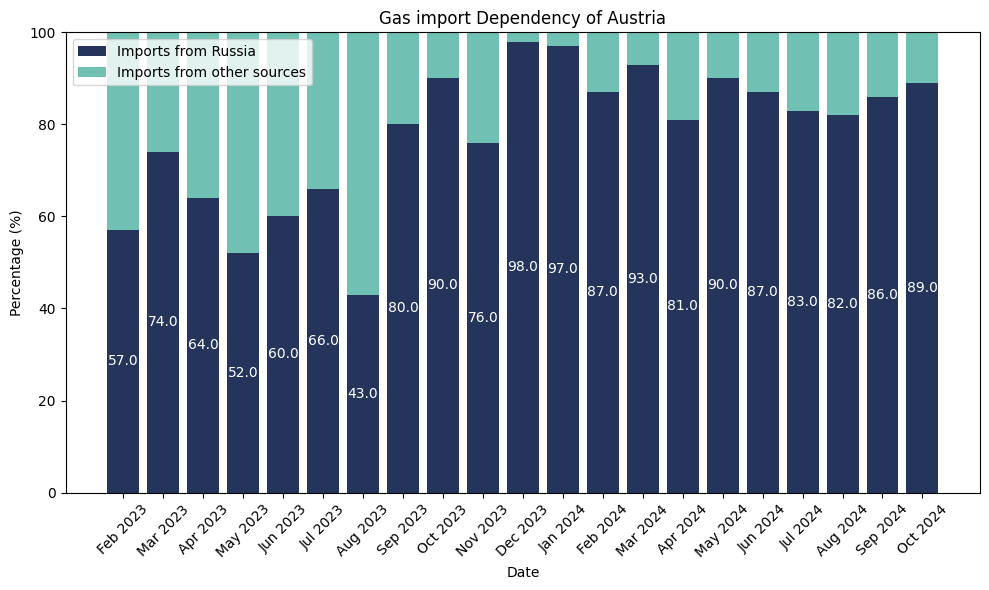

In [14]:
# Draw bar chart
plt.figure(figsize=(10,6))

# dark color:RU
bars1 = plt.bar(
    Austria['Date'],
    Austria['Imported gas from Russia in %'],
    color='#24345B',
    label='Imports from Russia'
)

# light colr:others
plt.bar(
    Austria['Date'],
    Austria['Imported gas from other countries in %'],
    bottom=Austria['Imported gas from Russia in %'],
    color='#70C1B3',
    label='Imports from other sources'
)
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 1), va='center', ha='center', color='white')


plt.title('Gas import Dependency of Austria')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)   #max 100
plt.legend()

plt.tight_layout()
plt.show()

Figure 2:Gas import dependency in Austria(Austria Gov,2024)